<a href="https://colab.research.google.com/github/arushisingla/DataAnalysis_Movies/blob/main/DataAnalysis_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Dataset:**  Top 10000 Popular Movies Dataset- TMDB
https://www.kaggle.com/omkarborikar/top-10000-popular-movies/metadata





In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1) Read Data

In [ ]:
# Read data from .csv file
data=pd.read_csv("/content/drive/MyDrive/Prob_Movies.csv")  

In [ ]:
#Extracting basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  10002 non-null  object 
 1   original_title     10001 non-null  object 
 2   popularity         10000 non-null  float64
 3   release_date       9962 non-null   object 
 4   vote_average       10000 non-null  float64
 5   vote_count         10000 non-null  float64
 6   genre              10000 non-null  object 
 7   overview           9900 non-null   object 
 8   revenue            9998 non-null   float64
 9   runtime            9989 non-null   float64
 10  tagline            7079 non-null   object 
dtypes: float64(5), object(6)
memory usage: 860.7+ KB


In [ ]:
print("The TMDB Movies dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))

The TMDB Movies dataset has 10014 rows and 11 columns


In [ ]:
# Preview top 10 rows using head()
data.head(10)

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,en,Venom: Let There Be Carnage,5401.308,30-09-2021,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,en,Eternals,3365.535,03-11-2021,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,en,Dune,2911.423,15-09-2021,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,en,Army of Thieves,2552.437,27-10-2021,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,en,Free Guy,1850.470,11-08-2021,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.
5,en,Gunpowder Milkshake,1453.423,14-07-2021,6.5,347.0,"['Action', 'Thriller', 'Crime']",In her turbulent life as a professional assass...,344931.0,114.0,Revenge is best served ice cold.
6,en,Venom,1212.352,28-09-2018,6.8,12126.0,"['Science Fiction', 'Action']",Investigative journalist Eddie Brock attempts ...,855013954.0,112.0,The world has enough Superheroes.
7,en,Halloween Kills,1023.024,14-10-2021,7.0,1134.0,"['Horror', 'Thriller']","Minutes after Laurie Strode, her daughter Kare...",118852075.0,105.0,Evil dies tonight.
8,pl,W lesie dziś nie zaśnie nikt 2,1089.852,27-10-2021,4.1,72.0,"['Horror', 'Thriller']",When something horrible happens to the only su...,0.0,96.0,NaN
9,en,American Badger,1148.822,05-03-2021,6.3,14.0,"['Action', 'Thriller']",A seemingly cold-blooded hitman is assigned to...,0.0,88.0,Justice Before Redemption


In [ ]:
# preview bottom 5 rows using tail()
data.tail()

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
10009,en,A Grand Day Out,9.266,18-05-1990,7.5,594.0,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0.0,23.0,NaN
10010,en,El cantante,10.417,12-09-2006,7.0,80.0,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0.0,116.0,"Based on the true story of the King of Salsa, ..."
10011,en,How I Live Now,9.520,10-09-2013,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home
10012,en,Once,9.267,23-03-2007,7.4,990.0,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?
10013,en,Manhattan Night,9.273,20-05-2016,6.0,304.0,"['Drama', 'Mystery', 'Thriller']",Porter Wren is a Manhattan tabloid writer with...,0.0,113.0,No reporter can resist a siren.


Computing the mean, sum, range 

In [ ]:
data.describe()

,popularity,vote_average,vote_count,revenue,runtime
count,10000.000000,10000.00000,10000.000000,9.998000e+03,9989.000000
mean,34.516871,6.29875,1315.084900,5.737536e+07,98.792772
std,100.693958,1.43426,2501.899103,1.480897e+08,28.771525
min,6.269000,0.00000,0.000000,0.000000e+00,0.000000
25%,11.908000,5.90000,118.000000,0.000000e+00,89.000000
50%,17.488000,6.50000,425.500000,5.931240e+05,99.000000
75%,29.626250,7.10000,1297.250000,4.768796e+07,113.000000
max,5401.308000,9.50000,30184.000000,2.847246e+09,400.000000


### Some Insights from description of data: 


In [ ]:
# check null values
data.isnull().sum()

original_language      12
original_title         13
popularity             14
release_date           52
vote_average           14
vote_count             14
genre                  14
overview              114
revenue                16
runtime                25
tagline              2935
dtype: int64

isnull() depicts the missing values in the dataset with respect to different columns- as inferenced above, the numerical values we wish to study have very few 0 values.


In [ ]:
print('The maximum and minimum value of popularity is {} and {} respectively'.format(data['popularity'].max(),data['popularity'].min()))

range = data['popularity'].max() - data['popularity'].min()
print('The range is:', range)

The maximum and minimum value of popularity is 5401.308000000001 and 6.269 respectively
The range is: 5395.039000000001


In [ ]:
print('The maximum and minimum value of average votes are {} and {} respectively'.format(data['vote_average'].max(),data['vote_average'].min()))

range = data['vote_average'].max() - data['vote_average'].min()
print('The range is:', range)

The maximum and minimum value of average votes are 9.5 and 0.0 respectively
The range is: 9.5


Data Selection - Indexing and Slicing


Extracting data by columns


In [ ]:
# Extract data as series
genre = data['genre']

In [ ]:
genre

0               ['Science Fiction', 'Action', 'Adventure']
1        ['Action', 'Adventure', 'Science Fiction', 'Fa...
2               ['Action', 'Adventure', 'Science Fiction']
3                          ['Action', 'Crime', 'Thriller']
4        ['Comedy', 'Action', 'Adventure', 'Science Fic...
                               ...                        
10009    ['Adventure', 'Animation', 'Comedy', 'Science ...
10010                        ['History', 'Drama', 'Music']
10011               ['Drama', 'Action', 'Thriller', 'War']
10012                        ['Drama', 'Music', 'Romance']
10013                     ['Drama', 'Mystery', 'Thriller']
Name: genre, Length: 10014, dtype: object

In [ ]:
type(genre)

pandas.core.series.Series

In [ ]:
# Extract data as dataframe
data[['genre']]

,genre
0,"['Science Fiction', 'Action', 'Adventure']"
1,"['Action', 'Adventure', 'Science Fiction', 'Fa..."
2,"['Action', 'Adventure', 'Science Fiction']"
3,"['Action', 'Crime', 'Thriller']"
4,"['Comedy', 'Action', 'Adventure', 'Science Fic..."
...,...
10009,"['Adventure', 'Animation', 'Comedy', 'Science ..."
10010,"['History', 'Drama', 'Music']"
10011,"['Drama', 'Action', 'Thriller', 'War']"
10012,"['Drama', 'Music', 'Romance']"


In [ ]:
type(data[['genre']])

pandas.core.frame.DataFrame

In [ ]:
some_cols = data[['original_title','genre','popularity','vote_count','revenue']]

In [ ]:
some_cols.head()

,original_title,genre,popularity,vote_count,revenue
0,Venom: Let There Be Carnage,"['Science Fiction', 'Action', 'Adventure']",5401.308,1736.0,424000000.0
1,Eternals,"['Action', 'Adventure', 'Science Fiction', 'Fa...",3365.535,622.0,165000000.0
2,Dune,"['Action', 'Adventure', 'Science Fiction']",2911.423,3632.0,331116356.0
3,Army of Thieves,"['Action', 'Crime', 'Thriller']",2552.437,555.0,0.0
4,Free Guy,"['Comedy', 'Action', 'Adventure', 'Science Fic...",1850.470,3493.0,331096766.0


Changing release date column to datetime pandas data type

In [ ]:
data['release_date']=pd.to_datetime(data['release_date'])
#data['date_published']=data["date_published"].dt.strftime("%m/%d/%Y")

dtypes function to check datatypes of each column

In [ ]:
data.dtypes

original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
vote_average                float64
vote_count                  float64
genre                        object
overview                     object
revenue                     float64
runtime                     float64
tagline                      object
dtype: object

Comparing two dates

In [ ]:
print(data['release_date'].iloc[1000])
print(data['release_date'].iloc[1500])
print(data['release_date'].iloc[1000]>data['release_date'].iloc[1500])

2000-06-22 00:00:00
2018-09-05 00:00:00
False


Using Pandas histogram function (with support from matplotlib) to understand the numerical attributes using graphs

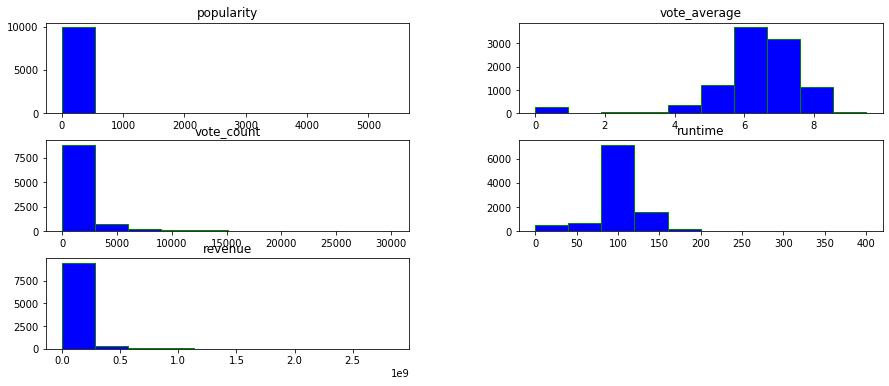

In [ ]:
numerical_attributes = ['popularity', 'vote_average', 'vote_count', 'runtime','revenue']
data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'green', grid=False);

Using year and month attributes of Pandas datetime datatype to add separate year and month columns in the datset using the release date column

In [ ]:
data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month

In [ ]:
data.dtypes

original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
vote_average                float64
vote_count                  float64
genre                        object
overview                     object
revenue                     float64
runtime                     float64
tagline                      object
year                        float64
month                       float64
dtype: object

Seeing release years of top 100 movies with highest revenue

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


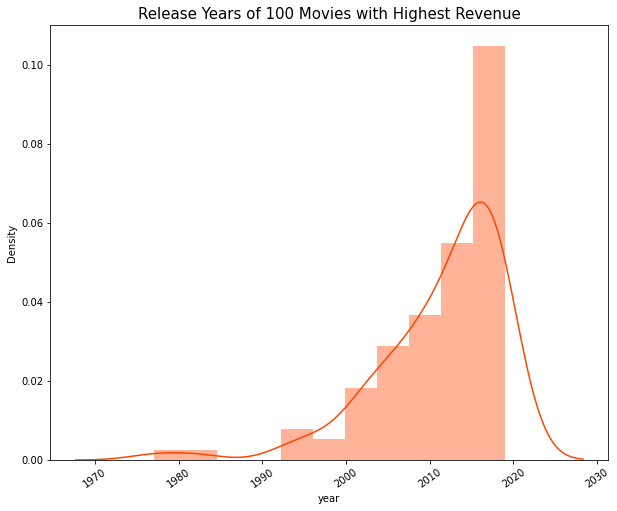

In [ ]:
highest_revenued_100_movies = data[data["genre"] != 0].sort_values(by="revenue", ascending=False).head(100)
plt.figure(figsize=(10,8))
sns.distplot(highest_revenued_100_movies["year"], color="orangered")
plt.title("Release Years of 100 Movies with Highest Revenue", size=15)
plt.xticks(rotation=35)
plt.show()

Sorting Data according to Popularity from the most well liked to least

In [ ]:
data=data.sort_values('popularity', ascending=False)
data.head(5)

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline,year,month
0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN,2021.0,9.0
1,en,Eternals,3365.535,2021-03-11,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...,2021.0,3.0
2,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits.",2021.0,9.0
3,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend.",2021.0,10.0
4,en,Free Guy,1850.470,2021-11-08,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.,2021.0,11.0


##Answering specific questions of interest as inferenced from the dataset and various graphs

## Q1 Which genre is the most popular?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


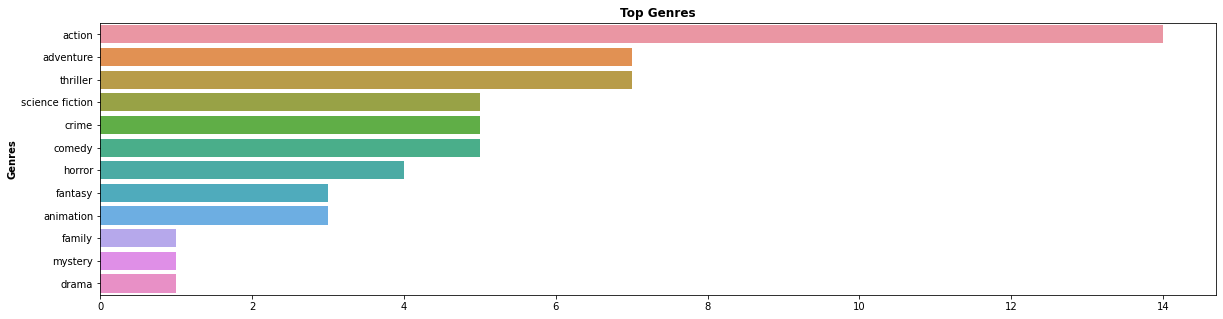

In [ ]:
#Python Counter is a container that will hold the count of each of the elements present in the container. It will return a dictionary. 
#Using seaborn bar plot to graphically show the most popular genre 
from collections import Counter
genre_arr=[]
datagenre= data[data['genre'] != '[]']

for x in datagenre['genre'][:20]:
  
  x=x.replace("['","")
  x=x.replace("']","")
  x=x.replace("'","")
  for y in x.split(','):
        genre_arr.append(y.strip().lower())

count=Counter(genre_arr)
count=count.most_common()[:20]
x,y=map(list,zip(*count))

fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(y,x)
g.set_ylabel("Genres", weight = "bold")
g.set_title("Top Genres", weight = "bold")
plt.show()

###As it can be seen above, 'Action' is an evident popular choice, followed by 'Thriller' and 'Adventure'.

## Q2   Which year saw a rise in overall popularity of movies?


<function matplotlib.pyplot.show>

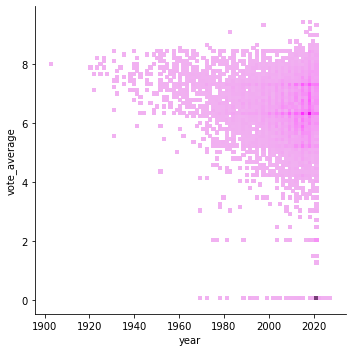

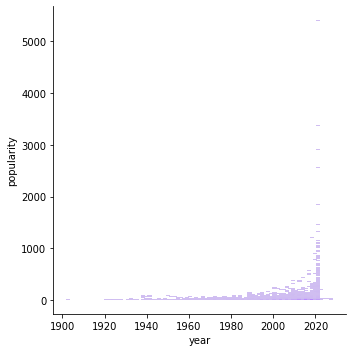

In [ ]:
#Using displot to make a histogram to demonstrate the distribution of popularity (Seaborn has been used)
sns.color_palette("hls", 8)
a=sns.displot(data=data, x="year", y="vote_average",color='m')
b= sns.displot(data=data, x="year", y="popularity", color='indigo', alpha=1)
plt.show

###As observed from the graphs, The **2010's** saw an extraordinary rise in overall popularity of movies, with the peak being in **2018-2020**

### Q3 How does the length of a movie affect its rating?

<function matplotlib.pyplot.show>

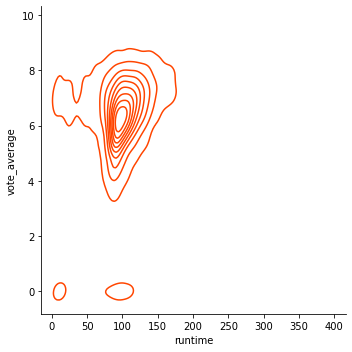

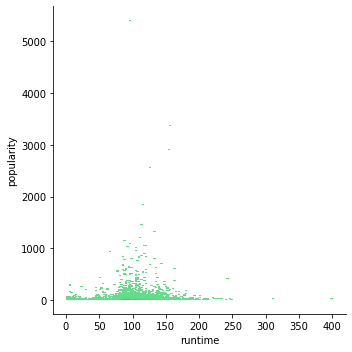

In [ ]:
#Displot has been used to make the Kernel Density Estimation (to estimate the probability density of average votes)
data_ref= data[data['runtime'] != 0]
a=sns.displot(data=data_ref, x="runtime", y="vote_average", kind="kde", color="orangered")
a=sns.displot(data=data_ref, x="runtime", y="popularity", kind="hist", color="springgreen")
plt.show

### We can infer from the graph that movies that are around the **length of 80-100 minutes** are preferred by people. Thus, a movie around 90 minutes is more likely to do well at the box office.

## Q4 Depending on the genre of a movie, which month is the best to release it?

Formatting the genre column to remove brackets and apostrophes so only comma separated string remains

In [ ]:
relevant_data=data[['genre','month','popularity']]
relevant_data= relevant_data[data['genre'] != '[]']
relevant_data = relevant_data[relevant_data['genre'].notna()]
# print(relevant_data.shape[0], relevant_data.shape[1])
# #for i in range(len(relevant_data)):
#   #x=x.lstrip("[")
# for index, row in relevant_data.iterrows():
#   x=row['genre']
#   x=x.replace("[","")
#   x=x.replace("]","")
#   x=x.replace("'","")
#   x=x.lower()
#   row['genre']=x
#   #relevant_data.loc[i, 'genre']=x
relevant_data['genre']=relevant_data['genre'].replace(to_replace=["\[","'","\]"," "],value="", regex=True)

Separating comma separated values in genre column to different rows such that popularity and month remains same but genre separates

In [ ]:
relevant_data=relevant_data.drop('genre', axis=1).join(relevant_data['genre'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))

In [ ]:
relevant_data.head(10)

,month,popularity,genre
0,9.0,5401.308,ScienceFiction
0,9.0,5401.308,Action
0,9.0,5401.308,Adventure
1,3.0,3365.535,Action
1,3.0,3365.535,Adventure
1,3.0,3365.535,ScienceFiction
1,3.0,3365.535,Fantasy
2,9.0,2911.423,Action
2,9.0,2911.423,Adventure
2,9.0,2911.423,ScienceFiction


Sorting relevant_data dataset firstly according to ascending order of genre, followed by popularity from most to least of each genre

In [ ]:
relevant_data=relevant_data.sort_values(['genre','popularity'], ascending=(True, False))

to_csv(): to convert pandas dataset to a .csv (comma separated file) format

In [ ]:
# relevant_data.to_csv("mod.csv")
# from google.colab import files
# files.download('mod.csv')

In [ ]:
relevant_data['genre'].value_counts()

Drama             3823
Comedy            3010
Action            2576
Thriller          2551
Adventure         1761
Horror            1542
Romance           1412
Family            1364
Animation         1363
ScienceFiction    1270
Fantasy           1264
Crime             1240
Mystery            808
History            405
Documentary        306
Music              301
War                272
TVMovie            242
Western            126
Name: genre, dtype: int64

In [ ]:
ans=[]

Applying custom function to the dataset after grouping according to the different genre in order to save the month where genre was most popular in 'ans' list

In [ ]:
from collections import Counter
def fun(df):
  count=dict(Counter(df['month'][:30]))
  m=max(count, key=count.get)
  print(df['genre'])
  print("Month: ",m)
  ans.append(m)

In [ ]:
relevant_data.groupby(['genre']).apply(fun)

0       Action
1       Action
2       Action
3       Action
4       Action
         ...  
9486    Action
9783    Action
8915    Action
9534    Action
9472    Action
Name: genre, Length: 2576, dtype: object
Month:  7.0
0       Adventure
1       Adventure
2       Adventure
4       Adventure
12      Adventure
          ...    
9889    Adventure
8624    Adventure
8646    Adventure
9659    Adventure
8579    Adventure
Name: genre, Length: 1761, dtype: object
Month:  9.0
11      Animation
10      Animation
18      Animation
24      Animation
25      Animation
          ...    
9659    Animation
9443    Animation
9581    Animation
8768    Animation
9666    Animation
Name: genre, Length: 1363, dtype: object
Month:  9.0
4       Comedy
10      Comedy
22      Comedy
20      Comedy
16      Comedy
         ...  
9287    Comedy
9371    Comedy
9534    Comedy
9472    Comedy
9527    Comedy
Name: genre, Length: 3010, dtype: object
Month:  1.0
3       Crime
5       Crime
14      Crime
22      Crime
20    

""


In [ ]:
arr=relevant_data.genre.unique()
print("Choose your genre: ")
i = 0
while i < 19:
  print(i+1,")",arr[i])
  i+=1
gen= int(input("Enter choice (1-19): "))
print("Best month to release the movie is:", end=" ")
m=ans[gen-1]
if m==1:
  print("January")
elif m==2:
  print("Feburary") 
elif m==3:
  print("March") 
elif m==4:
  print("April") 
elif m==5:
  print("May") 
elif m==6:
  print("June") 
elif m==7:
  print("July") 
elif m==8:
  print("August") 
elif m==9:
  print("September") 
elif m==10:
  print("october") 
elif m==11:
  print("November")
elif m==12:
  print("December")    


Choose your genre: 
1 ) Action
2 ) Adventure
3 ) Animation
4 ) Comedy
5 ) Crime
6 ) Documentary
7 ) Drama
8 ) Family
9 ) Fantasy
10 ) History
11 ) Horror
12 ) Music
13 ) Mystery
14 ) Romance
15 ) ScienceFiction
16 ) TVMovie
17 ) Thriller
18 ) War
19 ) Western
Enter choice (1-19): 1
Best month to release the movie is: July


## Q5 After English, what is the most popular language?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


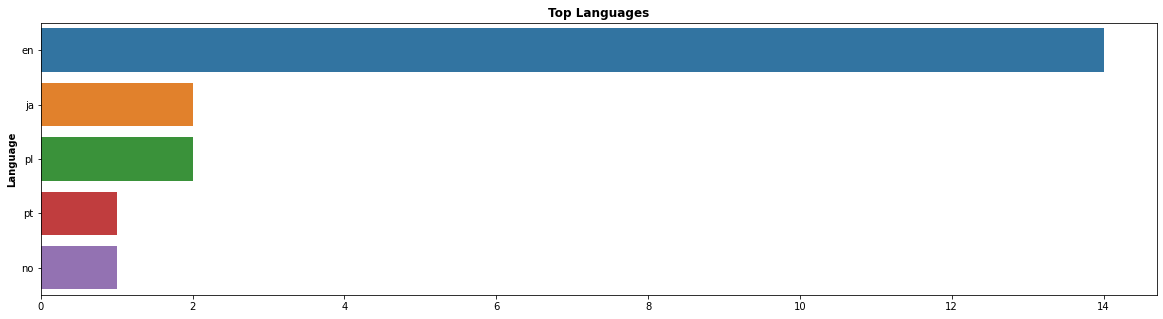

In [ ]:
##Python Counter is a container that will hold the count of each of the elements present in the container. It will return a dictionary. 

from collections import Counter
genre_arr=[]
datalanguage= data[data['original_language'] != '[]']

for x in datalanguage['original_language'][:20]:
  
  x=x.replace("['","")
  x=x.replace("']","")
  x=x.replace("'","")
  for y in x.split(','):
        genre_arr.append(y.strip().lower())

count=Counter(genre_arr)
count=count.most_common()[:20]
x,y=map(list,zip(*count))

fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(y,x)
g.set_ylabel("Language", weight = "bold")
g.set_title("Top Languages", weight = "bold")
plt.show()

 The most preferred language after English is **Japanese**, followed closely by **Polish**. 

## Summary of learnings from the analysis

We've run an analysis on a dataset of the top 10000 movies according to TMDB, and drawn a number of valuable inferences vital to understanding the nature of cinema and what affects a movie's ratings and popularity.

-To begin with, the most popular genre out of 19 genres, turned out to be Action, standing at 14, followed by Thriller and Adventure at 7.3. 

-The year that saw a rise in overall popularity of movies came out to be the 2010s where there was an 'extraordinary rise in overall popularity of movies' with a peak in the years 2018-2020.

-In terms of the length of movies, those around the time span of 80-100 minutes are more likely to do well at the box office.

-Lastly, the more preferred language after English was Japanese, with Polish coing very close. The reason why we chose to compare all languages apart from English was due to it evidently having a recurring occurence in the dataset. 


## Future Scope of Analysis

In the future, for further analysis, a Machine Learning model can be made that can predict the revenue of a movie that will be released and the best time to release it. 

##Reference links:

Data visualization with python Matplotlib https://medium.com/swlh/data-visualization-with-python-matplotlib-16880d0d3a44

Datatypes in pandas https://towardsdatascience.com/change-column-data-type-in-pandas-954d7acdef1d

Edtiting data in pandas dataframe
https://towardsdatascience.com/a-really-simple-way-to-edit-row-by-row-in-a-pandas-dataframe-75d339cbd313

Applying cutom functions to groups of data in Pandas https://towardsdatascience.com/applying-custom-functions-to-groups-of-data-in-pandas-928d7eece0aa#:~:text=You%20can%20also%20create%20custom,ll%20see%20in%20a%20moment

Learning Python seaborn https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp
